In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
'''
portfolio = ['alkylamine','asianpaint','axisbank','bergepaint','bhartiartl','canbk','dmart','federalbnk','havells','hdfcbank',
             'hdfclife','hindunilvr','ibrealest','icicibank','indusindbk','infy','irctc','itc','mhril','motilalofs',
             'nationalum','ntpc','paras','reliance','sail','tataconsum','tatamotors','tatapower','tatasteel','tcs','zeel']

nextbuy = ['sbin','titan','ultracemco','kotakbank']

watchlist = ['equitasbnk','hcltech','heromotoco','iex','infobean','jublfood','lti','tipsindltd',
             'mastek','mindtree','relaxo']

skipped = []

stock_ids = list(set(portfolio + nextbuy + watchlist) - set(skipped))
stock_ids.sort()
'''

"\nportfolio = ['alkylamine','asianpaint','axisbank','bergepaint','bhartiartl','canbk','dmart','federalbnk','havells','hdfcbank',\n             'hdfclife','hindunilvr','ibrealest','icicibank','indusindbk','infy','irctc','itc','mhril','motilalofs',\n             'nationalum','ntpc','paras','reliance','sail','tataconsum','tatamotors','tatapower','tatasteel','tcs','zeel']\n\nnextbuy = ['sbin','titan','ultracemco','kotakbank']\n\nwatchlist = ['equitasbnk','hcltech','heromotoco','iex','infobean','jublfood','lti','tipsindltd',\n             'mastek','mindtree','relaxo']\n\nskipped = []\n\nstock_ids = list(set(portfolio + nextbuy + watchlist) - set(skipped))\nstock_ids.sort()\n"

In [3]:
import pandas as pd

mypf = pd.read_csv('data/myPortfolio.csv')

stock_ids = mypf[mypf['type'] == 'stock']['id'].unique()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,NSE
Date,
2019-01-02,10792.500000
2019-01-03,10672.250000
2019-01-04,10727.349609
2019-01-07,10771.799805
2019-01-08,10802.150391
...,...
2021-12-27,17086.250000
2021-12-28,17233.250000
2021-12-29,17213.599609


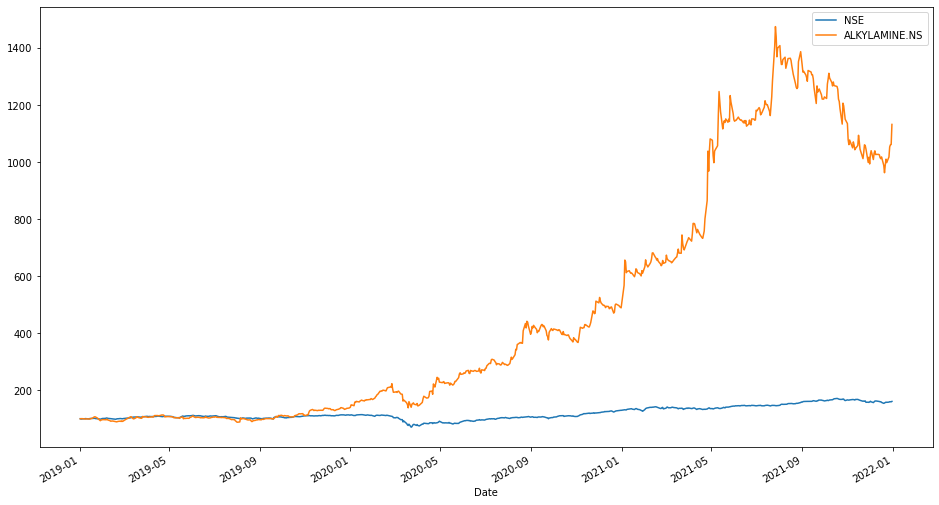

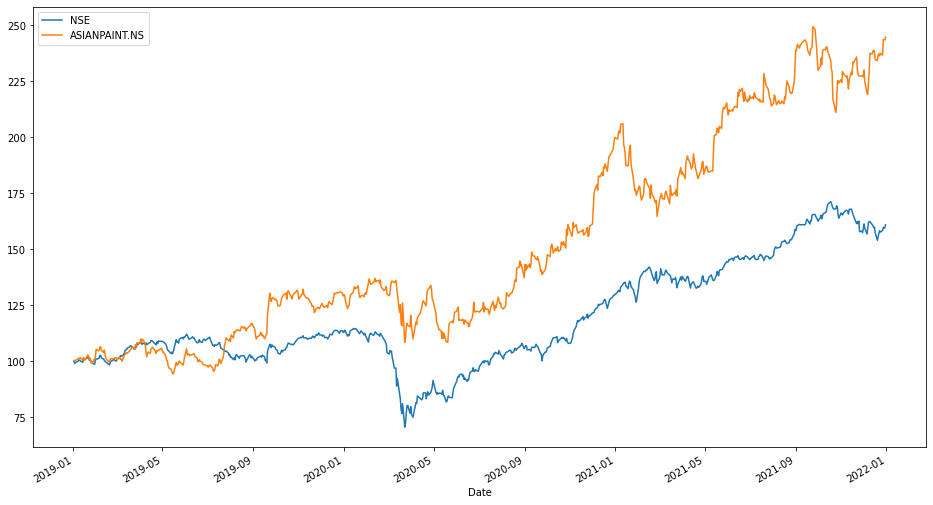

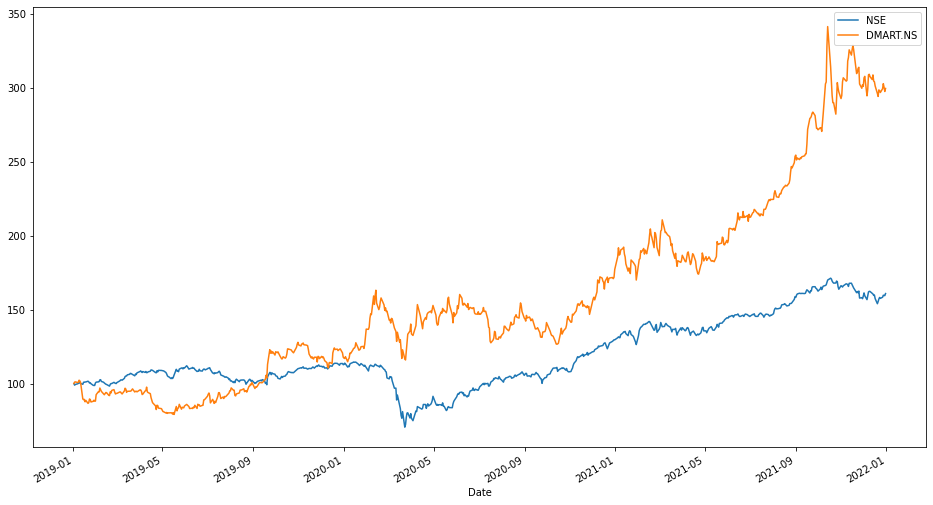

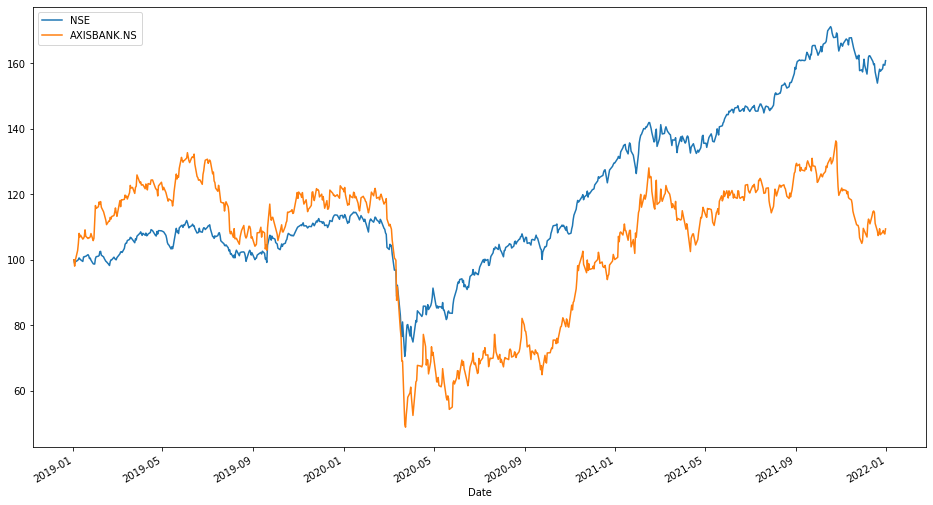

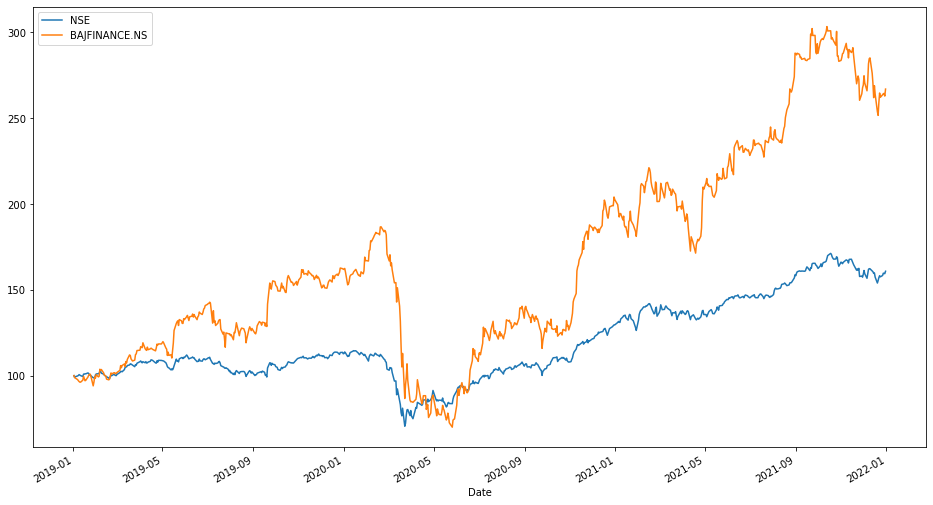

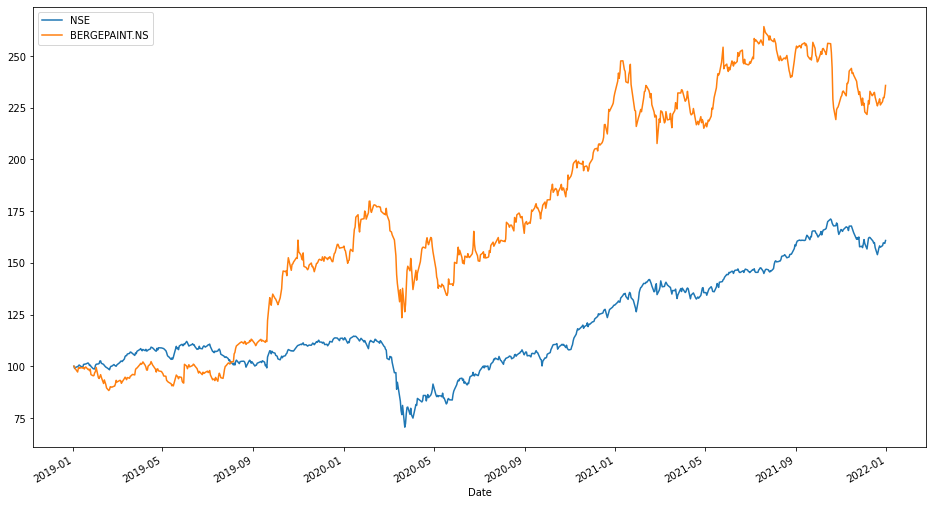

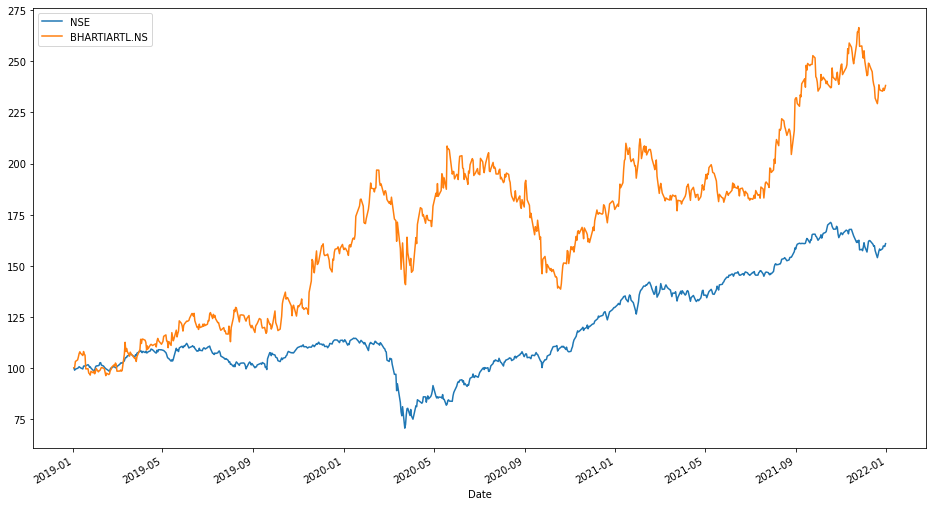

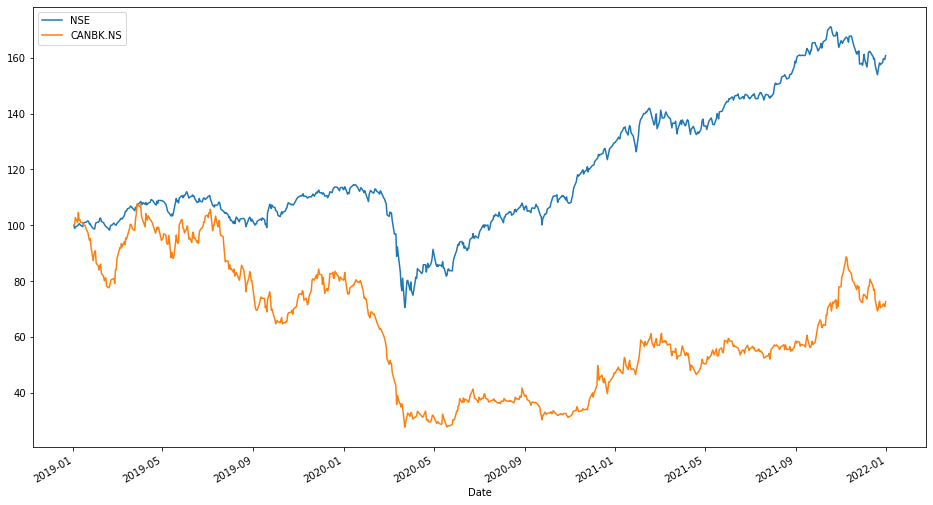

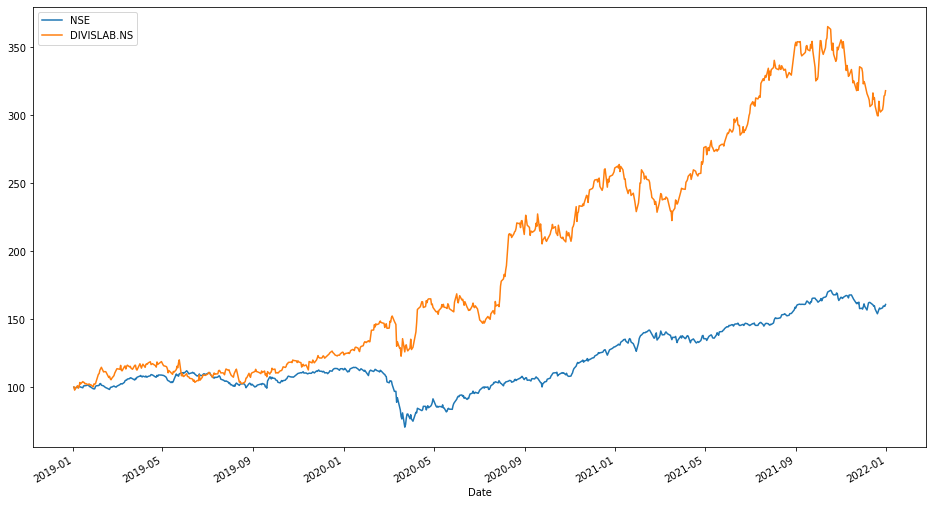

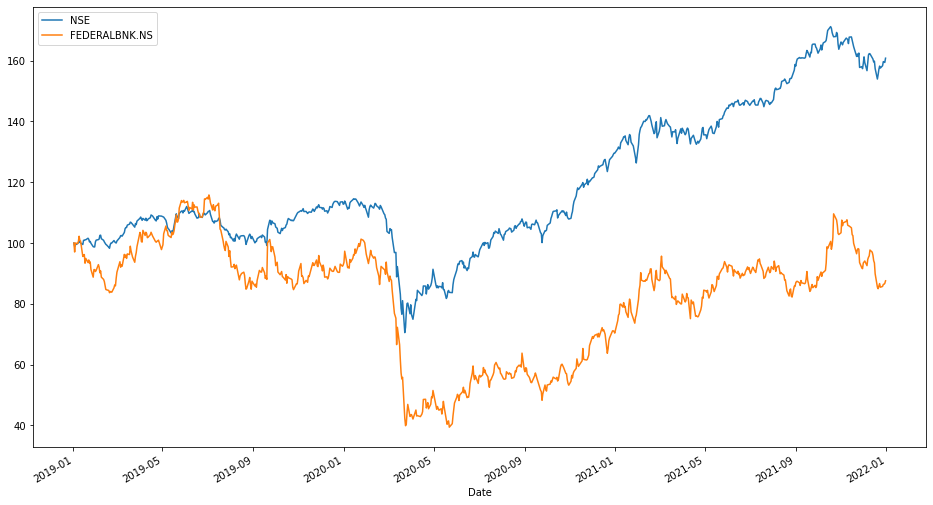

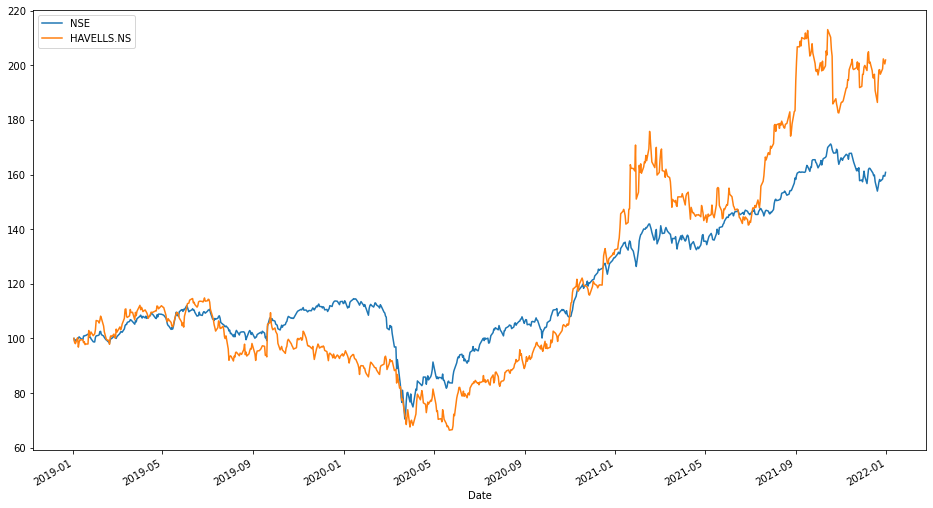

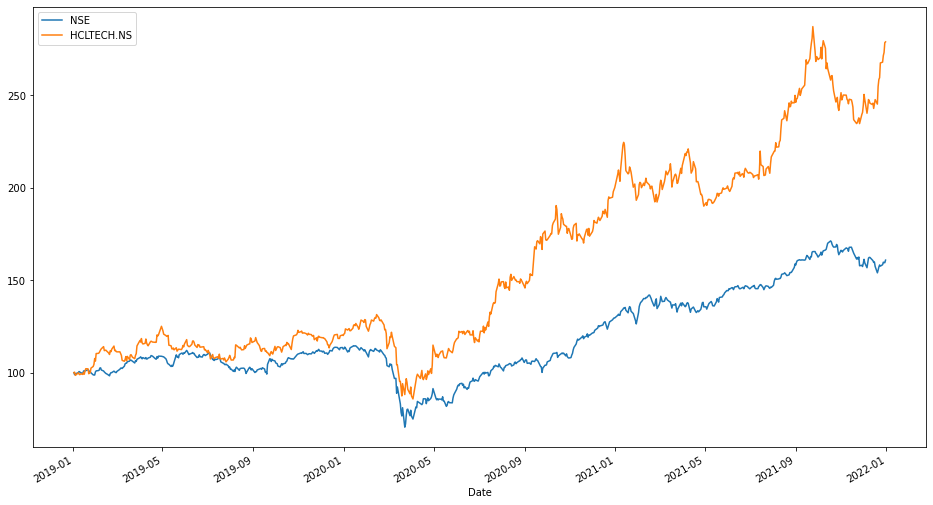

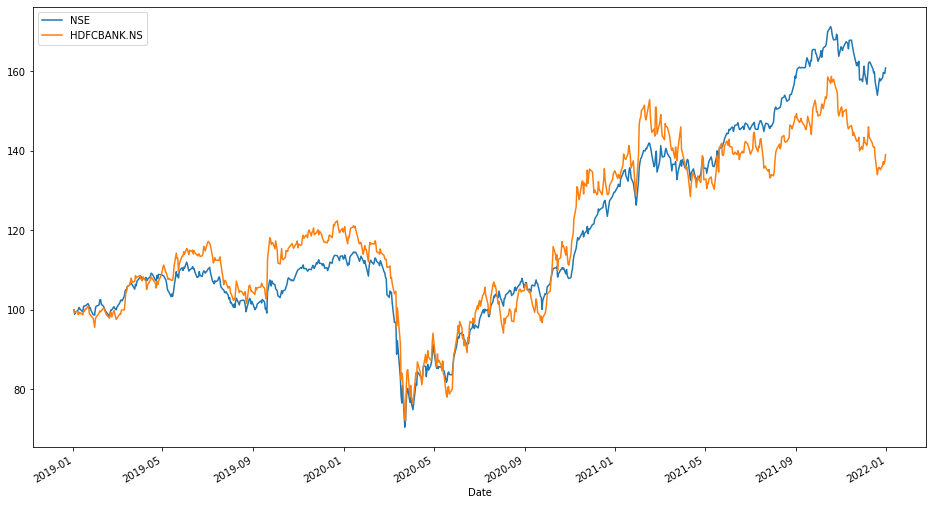

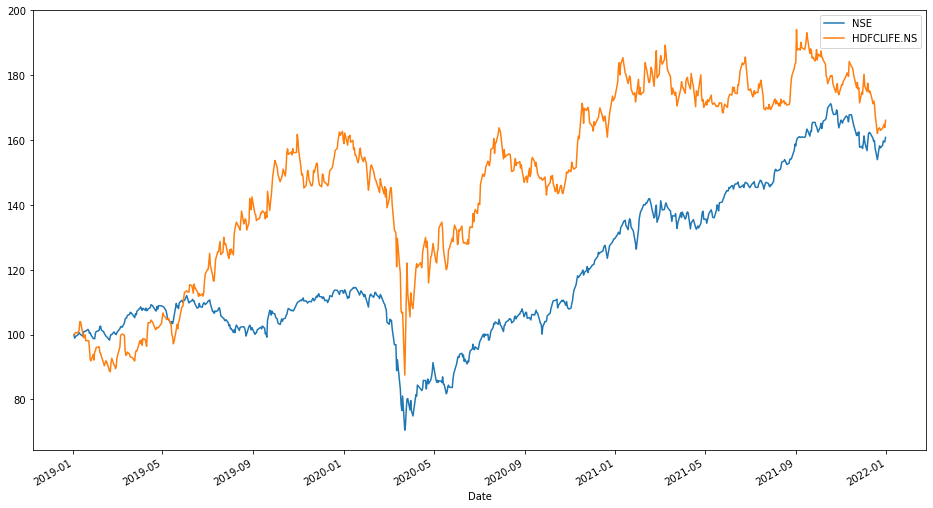

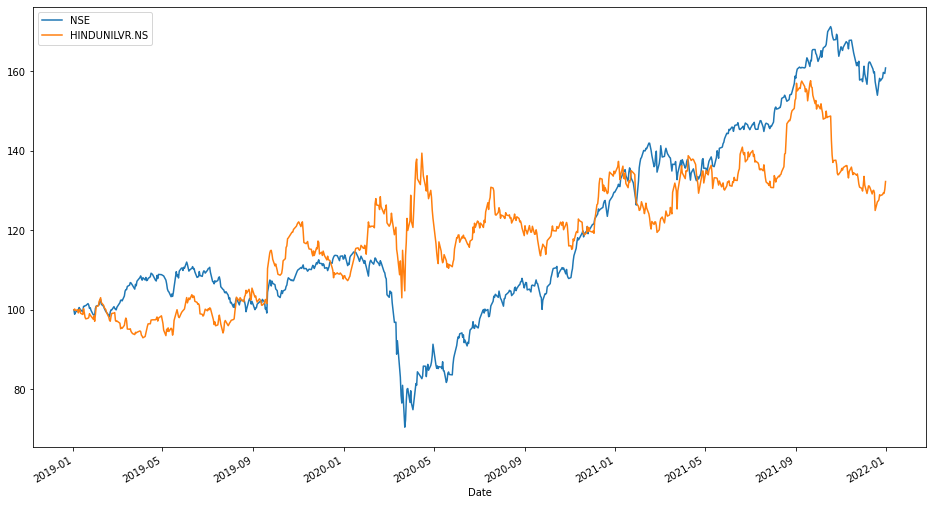

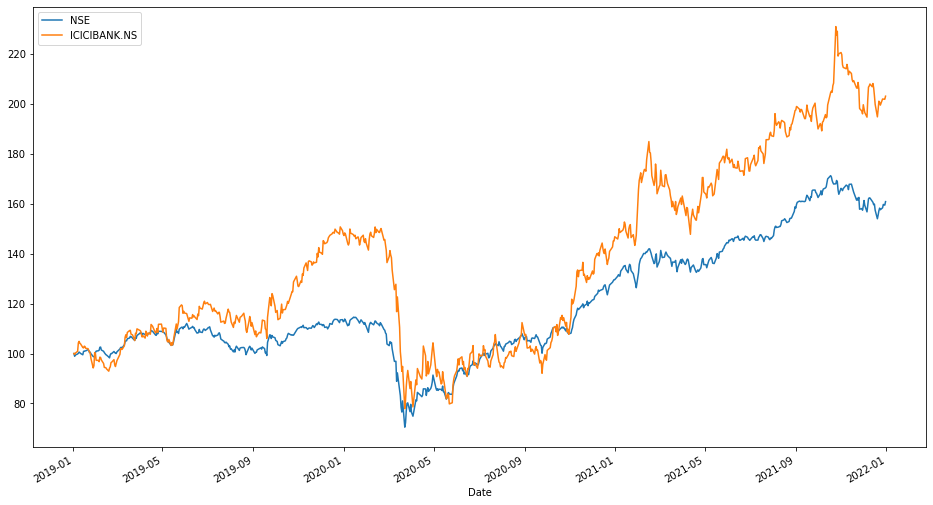

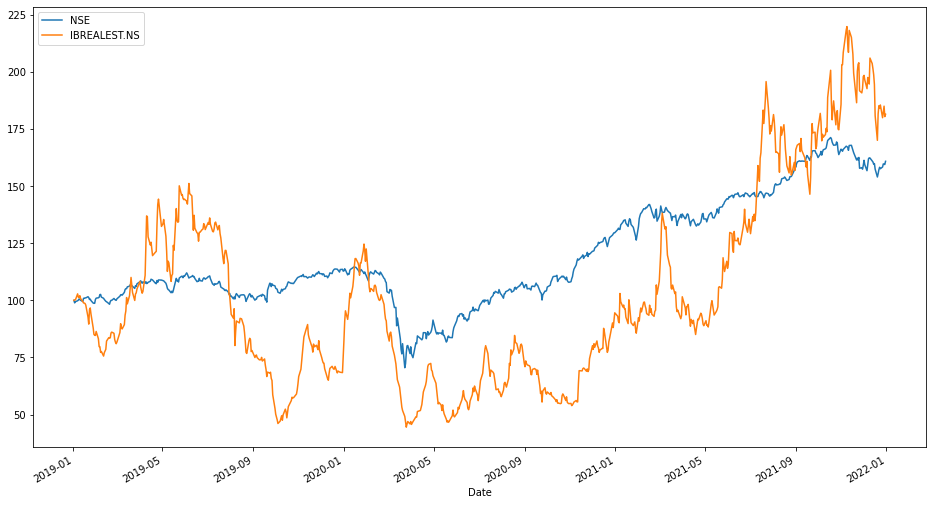

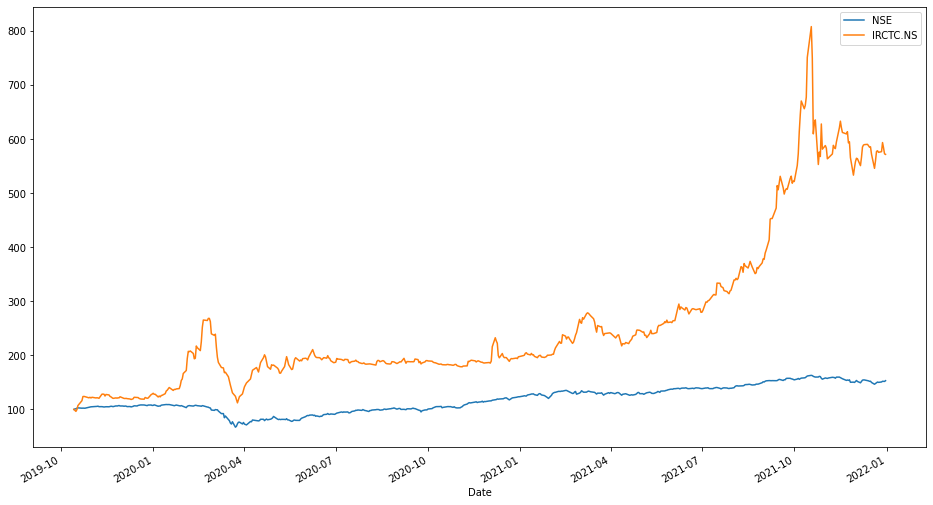

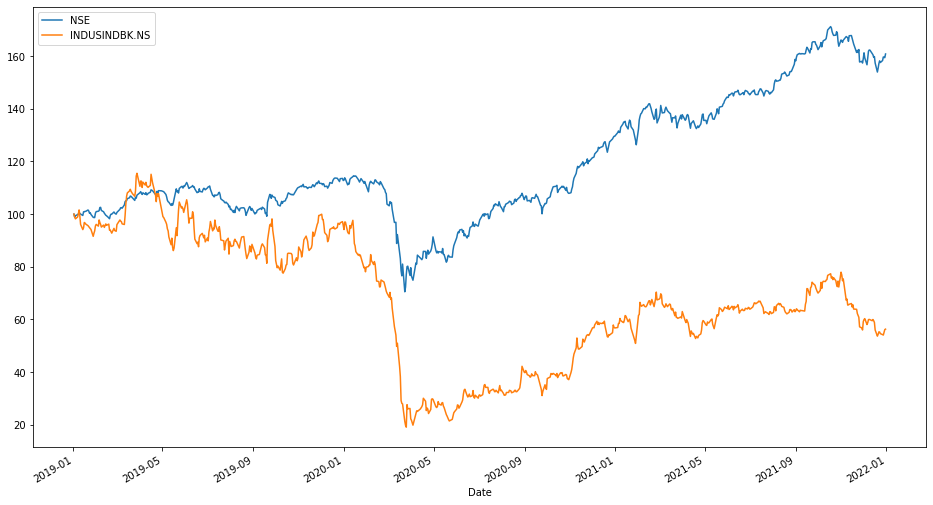

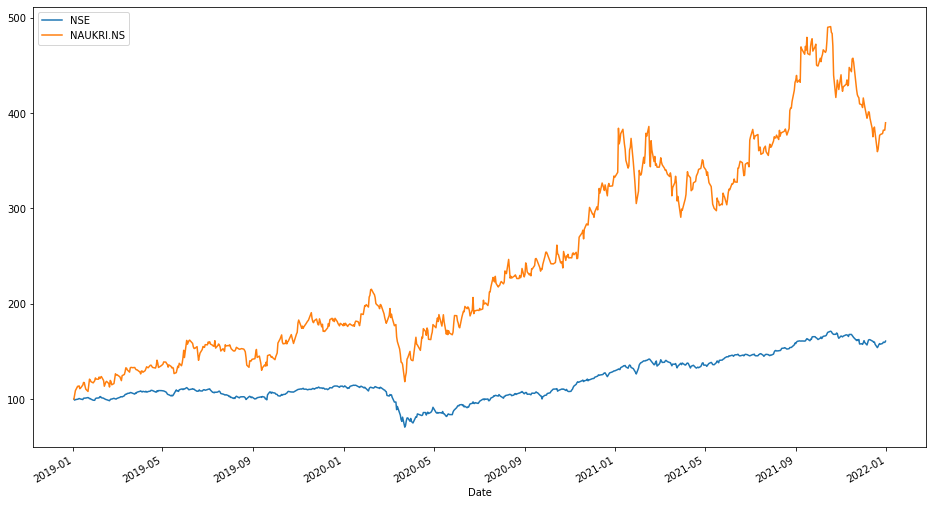

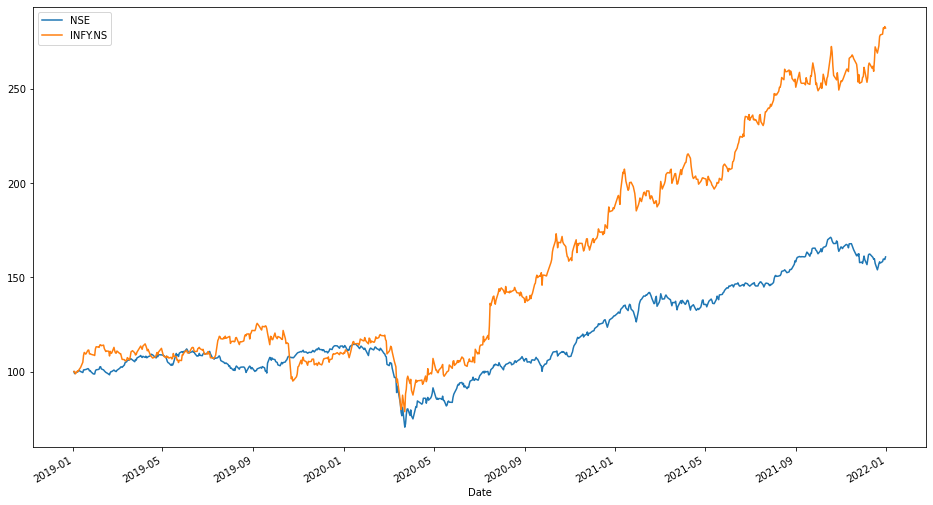

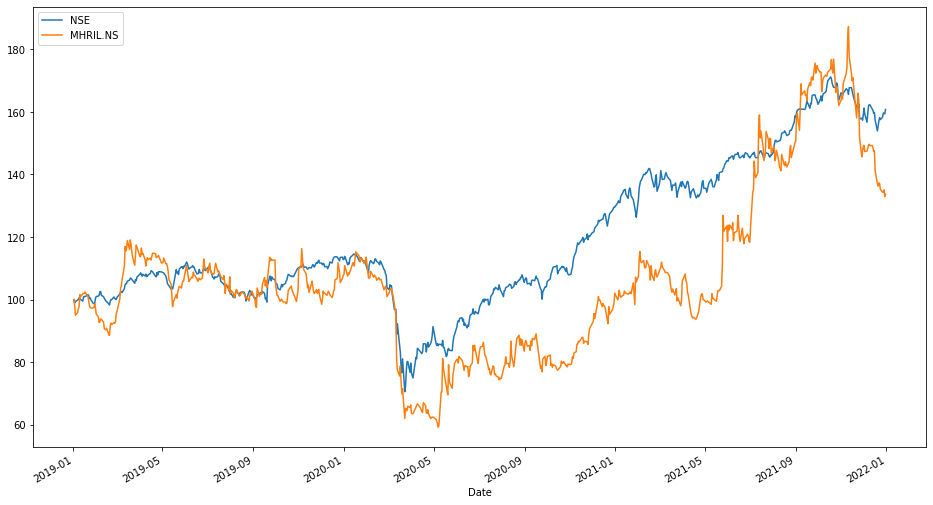

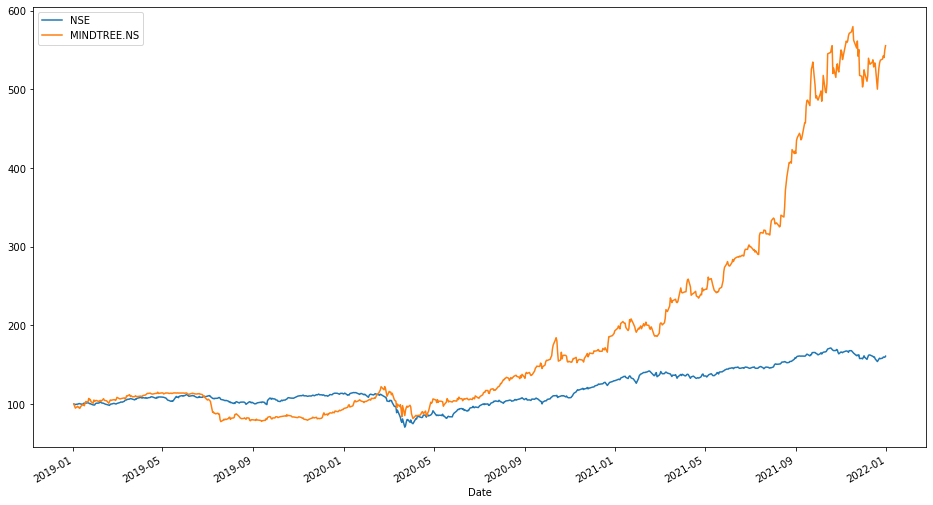

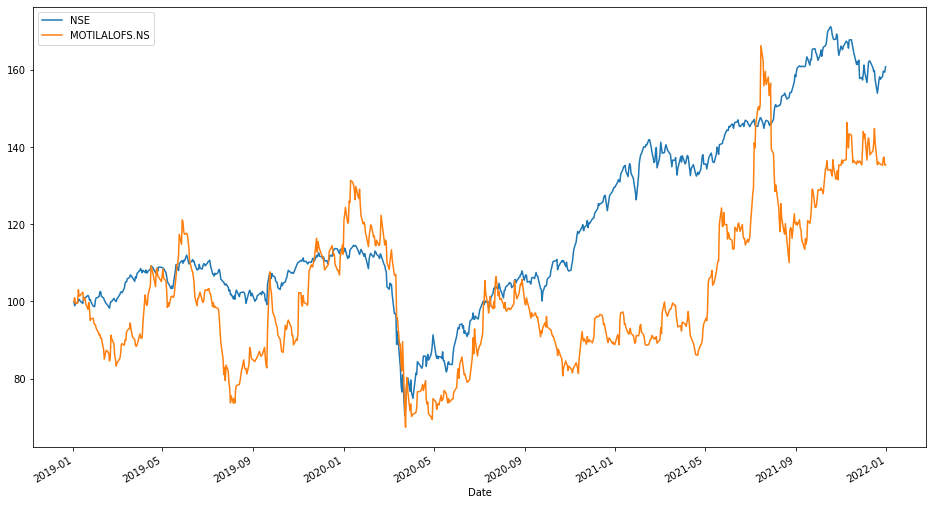

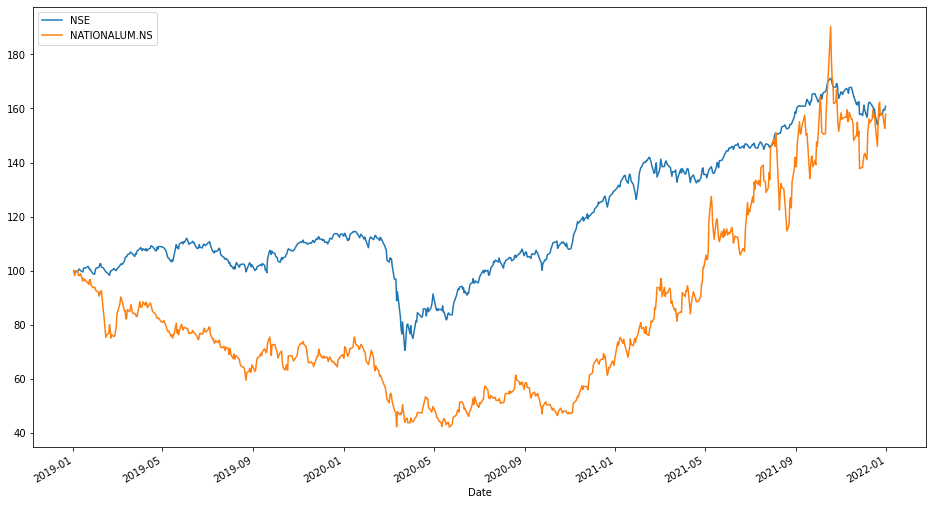

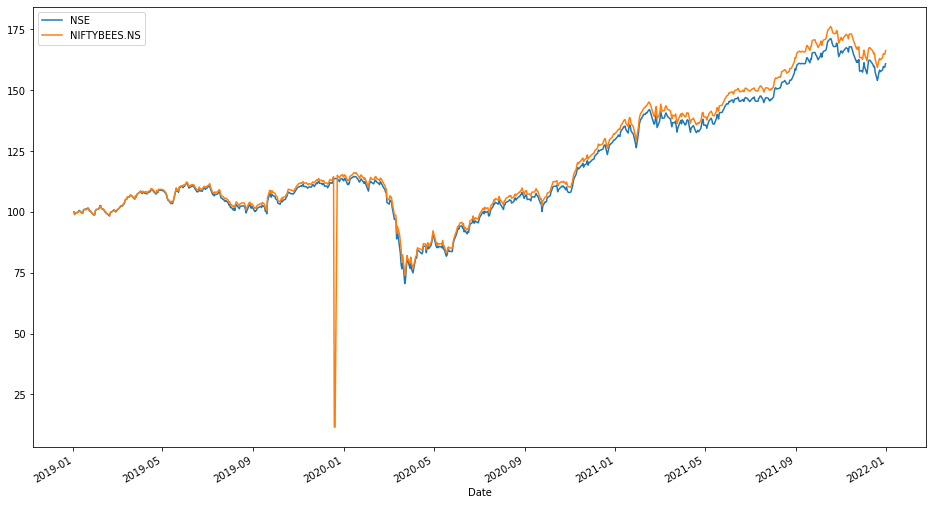

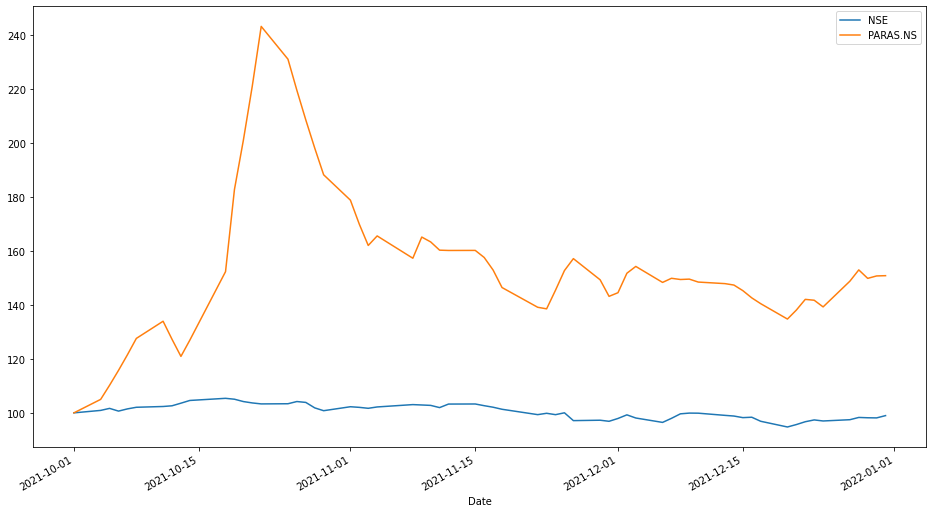

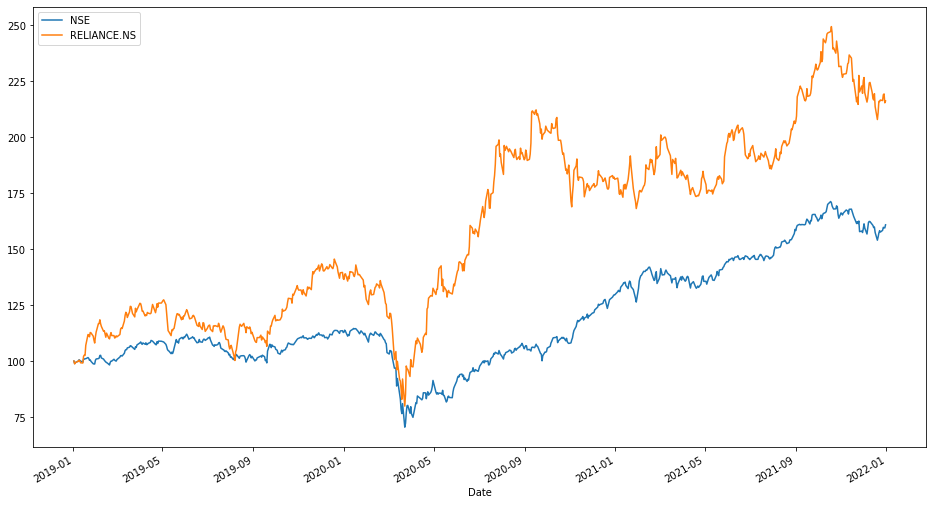

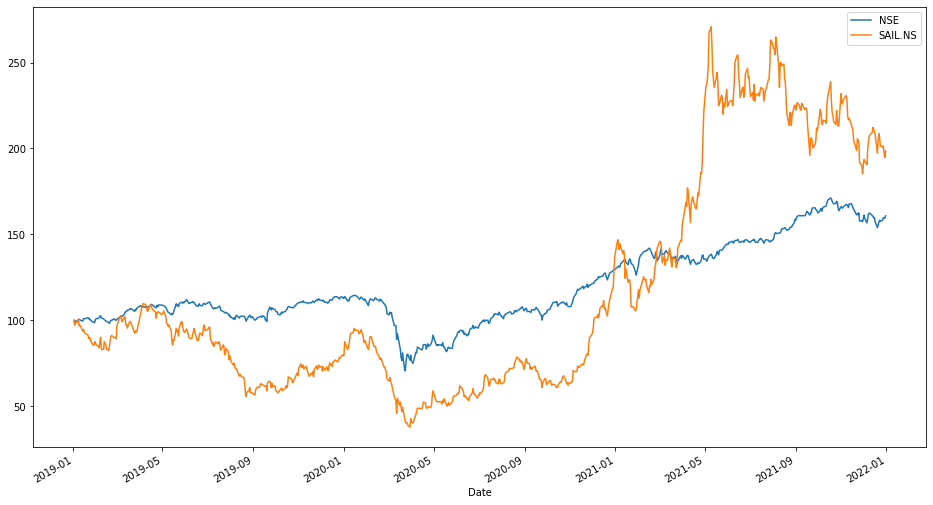

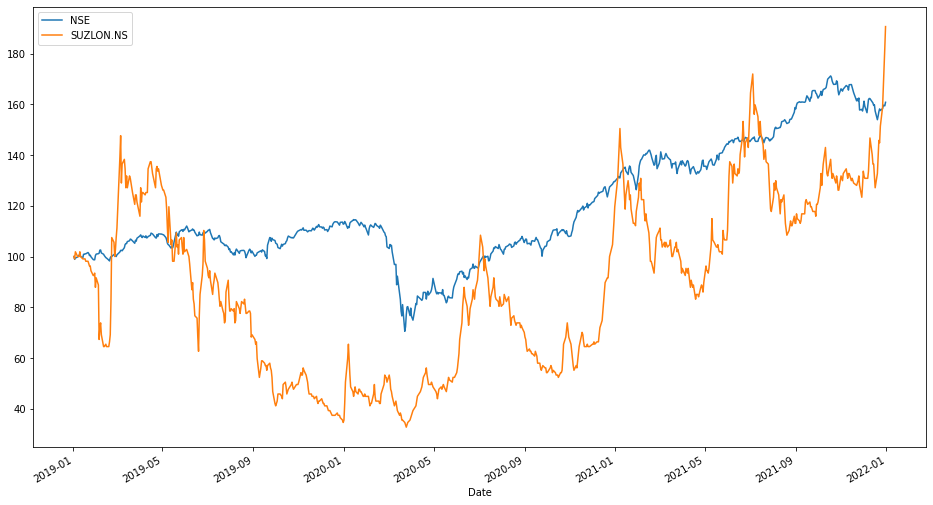

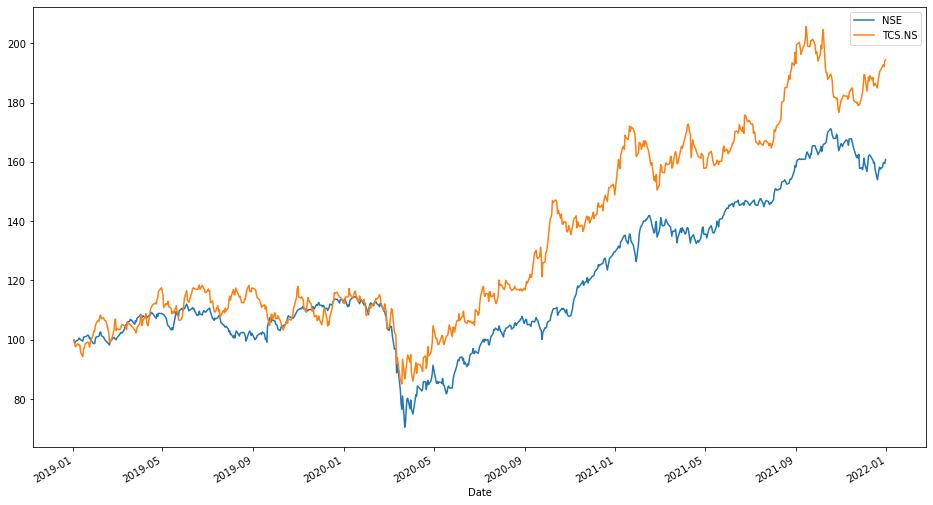

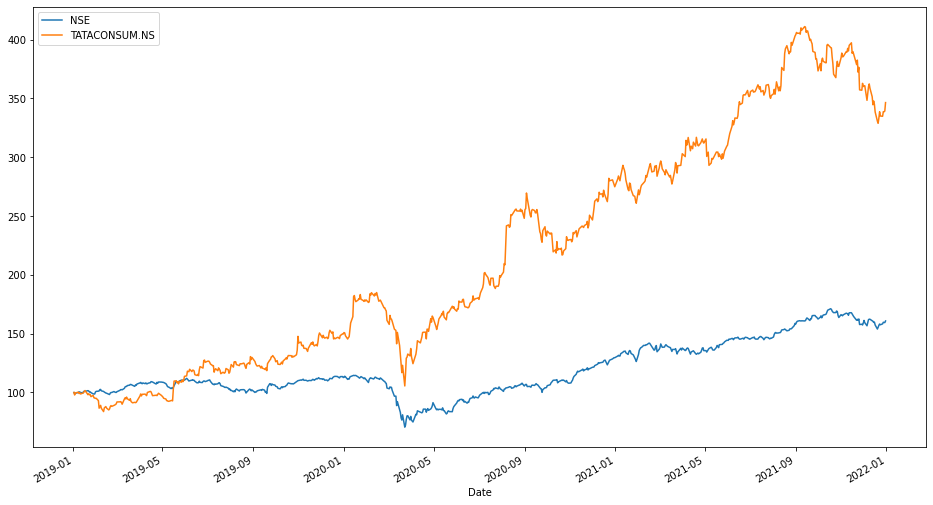

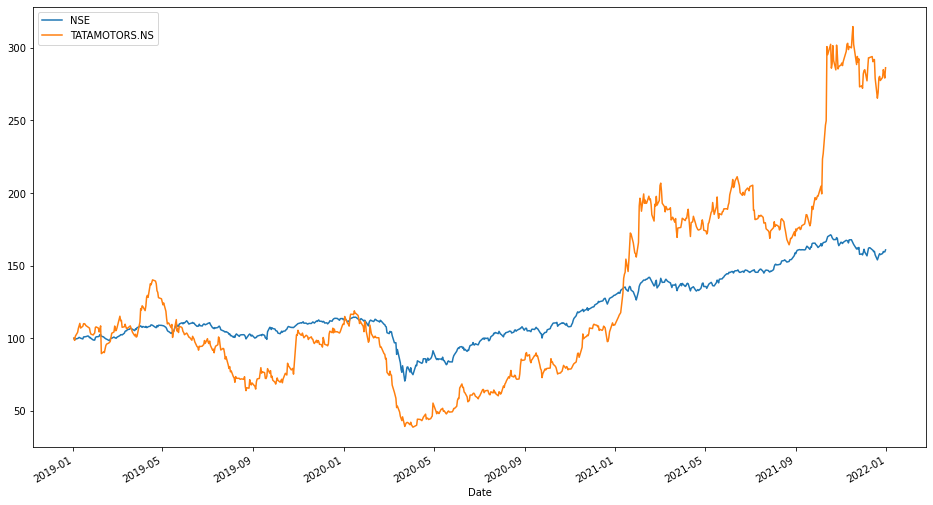

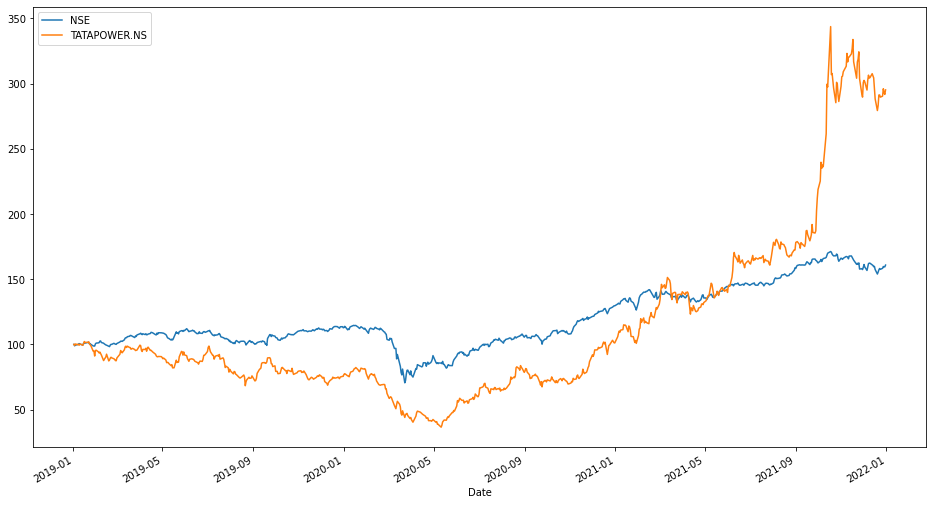

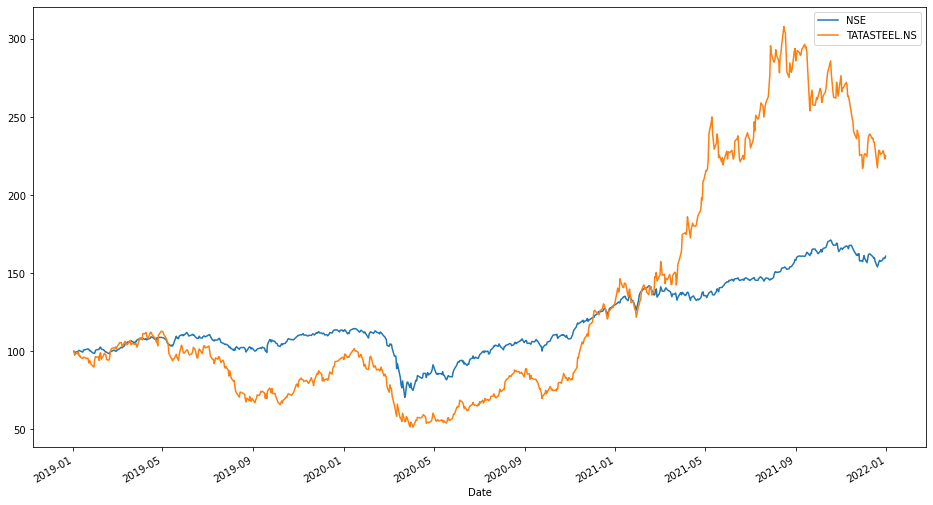

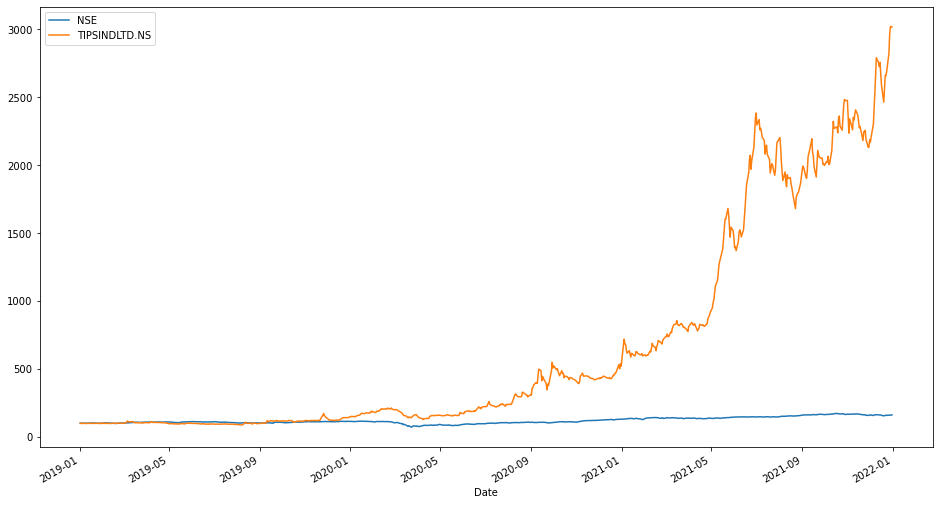

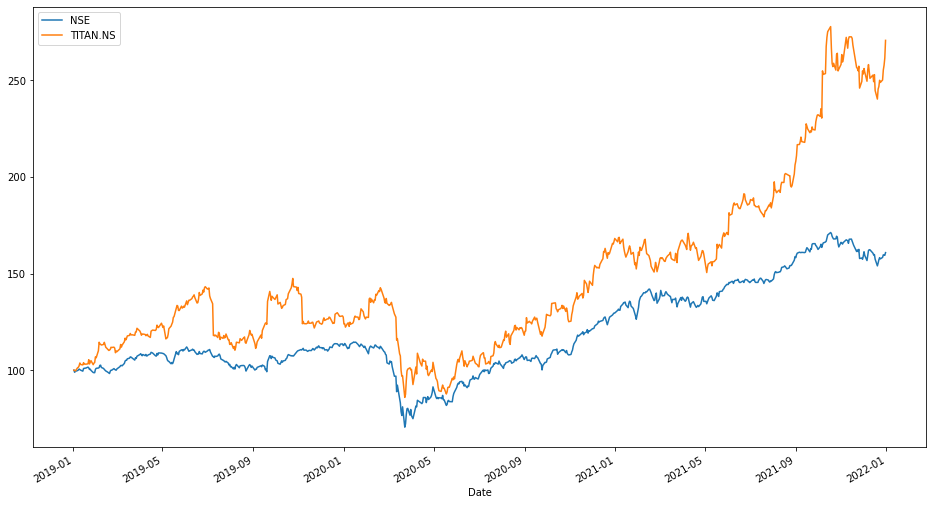

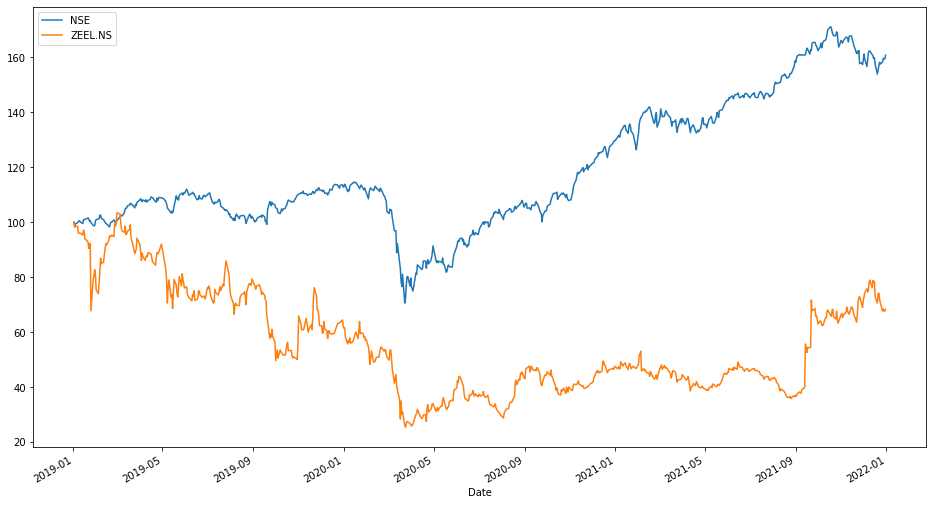

In [4]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
yfin.pdr_override()

start_date = '2019-01-01'
end_date = '2022-01-01'

stock_df = web.DataReader('^NSEI',  data_source='yahoo', start = start_date, end = end_date)['Close']
stock_df = pd.DataFrame(stock_df) 
stock_df.columns = {'NSE'}
#stock_df['NSE'] = round(stock_df['NSE']*100/(stock_df['NSE'][0]),2)

for stock_id in stock_ids:
    stock_id = stock_id.upper() + '.NS'
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-'))) 
    tmp_df = web.DataReader(stock_id,  data_source='yahoo', start = start, end = end)['Close']
    tmp_df = pd.DataFrame(tmp_df) # convert Series object to dataframe 
    tmp_df.columns = {stock_id} # assign new colun name
    tmp_df.dropna(axis = 0, inplace = True) # remove any null rows
    tmp_df[stock_id] = round(tmp_df[stock_id]*100/(tmp_df[stock_id][0]),2)
    comp_df = pd.merge(stock_df,tmp_df, left_index=True, right_index=True)    
    comp_df['NSE'] = round(comp_df['NSE']*100/(comp_df['NSE'][0]),2)
    comp_df[stock_id] = round(comp_df[stock_id]*100/(comp_df[stock_id][0]),2)
    comp_df.plot.line(figsize=(16,9))
    
stock_df    

In [5]:
'''
stock_ids = ['alkylamine','asianpaint','axisbank','bergepaint','bhartiartl','canbk','dmart','federalbnk','havells','hdfcbank',
             'hdfclife','hindunilvr','ibrealest','icicibank','indusindbk','infy','irctc','itc','mhril','motilalofs',
             'nationalum','ntpc','paras','reliance','sail','tataconsum','tatamotors','tatapower','tatasteel','tcs','zeel']

for stock_id in stock_ids:
    stock_id = stock_id.upper() + '.NS'
    stock_df[stock_id] = round(stock_df[stock_id]*100/(stock_df[stock_id][0]),2)
    
stock_df.plot.line(figsize=(16,9))
'''

"\nstock_ids = ['alkylamine','asianpaint','axisbank','bergepaint','bhartiartl','canbk','dmart','federalbnk','havells','hdfcbank',\n             'hdfclife','hindunilvr','ibrealest','icicibank','indusindbk','infy','irctc','itc','mhril','motilalofs',\n             'nationalum','ntpc','paras','reliance','sail','tataconsum','tatamotors','tatapower','tatasteel','tcs','zeel']\n\nfor stock_id in stock_ids:\n    stock_id = stock_id.upper() + '.NS'\n    stock_df[stock_id] = round(stock_df[stock_id]*100/(stock_df[stock_id][0]),2)\n    \nstock_df.plot.line(figsize=(16,9))\n"